# Introduction
## Type of CV problem
### Base on loss function
- classification
- regression

#### How to identify
- The output
    - With regresison: predict numbers in a given range
    - With classification: predict the class of things

### Base on tasks
1. classification: identify, categorize
    - applied on whole image
2. localization: alike detection but easier
    - Detect and object but only one object in the image (not multiple like detection)
    - is a regression problem

![An example](./example_CV.png)

- Usually identify by the center of bounding box
    - Bounding box (x, y, w, h)
        - where x is width, y is height, range (0, width || height)
        - w, h in scale 1 -> in range (0, 1)
3. detection: detect multiple object in the image (variety of types)
- much harder than localization
- both a classification and regression problem
- depend on layers, and objects (class) -> parameters
- In the example above each need one layer + 4 params for x, y, w, h -> 15 outputs

4. segmentation
- give color to different type of object
- same with classification though apply on a pixel not whole image as classification
    harder than classification
    
5. identification
- still a classification problem but can not be called as classification one

6. image captioning
- Input a image then generate captions
- Machine translation + CV


### Why
Particular loss function only apply on the corresponding problem

# Loss function
- Can be called cost function or target function
- Calculate the abs of predicted and ground-truth data
- Our objective is to minimize this value -> Optimazation problem
- Usually use GD (with momentum, Adam, ...) to make sense of this problem
- After using GD, we go back to update (back propagation)

Training is the process of finding set of params for better loss function value.

# Workflow
## Basic
1. Input
2. Feature extractor
- Output a dimensional vector
- Technique
    - shift
    - hoop
3. Use machine learning technique (SVM, Naives, Baiyes) to classified that vector

- Multiple times optimizing
-> Good extractor and good machine learning does not mean the output turns out to be good

## End-to-End 
- One-time optimization work

### CNN
ConvNet is a sequence of covolution layers, intersperd with activation functions.\
Use a sliding window (convolution / filter) to go through all the pixel to find things we want -> go through a activation function (0,1) pass or not to pass (does not care about data that is not necessary). Adding regression to take in the probability of things get pass (how much 0.5 or 0.8). Example: Relu, sigmoid, tang.\
Note that depth of filter must be equal to the original image. Sliding from left to right, up to down. Take product of each individual pixel on image with the filter then all sum it up -> Get a number. Get an activation map with depth = 1, width and height < the original width, height. ((Original - filter) / stride + 1). Each filter take out 1 information. Applying n numbers of fiter we get new image with new w x h x n image.\
Flatten out all the extracted image then using softmax (regresison) to arrive at probability.\

#### Stride
Pixel slide.\
Formulation:\
(N - F) / stride + 1

Requirement:
- If does not fit then you need to change stride
- Calculate before you apply


### Feature extractor 
Low-level: angle, edge.\
Mid-level: more abstract.\
High-level: more abstract and can not be realized.\
-> Use to apply machine learning method on.

# Drawback of Harris Corner Detection:
- Too many point for a sharp corner

# Harris Corner Detection in OpenCV
Use to detect corner.
- Inside a empty space, the pixel does not change (sum of information does not change), or on the line of border (still the same). But if you are on edge, every single slide make change to the data. -> Identify corner by seeing the change in information shift.

In [17]:
import numpy as np
import cv2 as cv
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt


In [23]:
def showImage(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

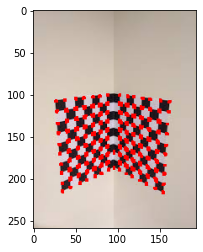

In [24]:
img = cv.imread('chessboard.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
showImage(img)

In [ ]:
# Get file from an url link
fileLink = 'https://media.discordapp.net/attachments/863427111973027856/887609614156308530/skyscraper1.jpg?width=473&height=593'
urllib.request.urlretrieve(fileLink, "skyscraper1.jpg")
img = Image.open('skyscraper1.jpg')

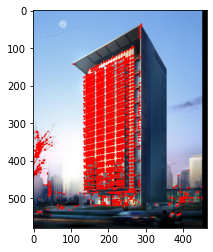

In [28]:
img = cv.imread('skyscraper1.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
showImage(img)

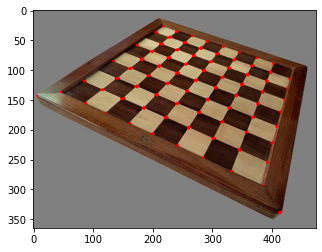

In [30]:
img = cv.imread('chessboard2.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
showImage(img)

# More accuracy with SubPixel

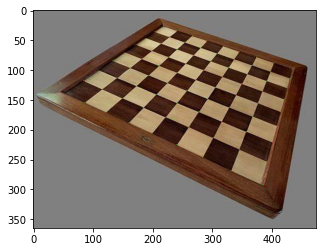

In [37]:
filename = 'chessboard2.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)
cv.putText(img, '', (10, 25),
        cv.FONT_HERSHEY_SIMPLEX, 0.7, (0.255,0), 2)

cv.imshow('demo', img)
cv.waitKey(0)
showImage(img)

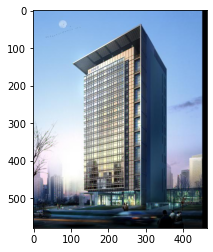

In [38]:
filename = 'skyscraper1.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)
cv.putText(img, '', (10, 25),
        cv.FONT_HERSHEY_SIMPLEX, 0.7, (0.255,0), 2)

cv.imshow('demo', img)
cv.waitKey(0)
showImage(img)